In [1]:
import pandas as pd
df = pd.read_excel("Telco_customer_churn.xlsx")
duplicates = df.duplicated().sum()

if duplicates == 0:
    print("No duplicates found.")
else:
    print(f"Found {duplicates} duplicate rows.")

No duplicates found.


In [2]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors='coerce')
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [4]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = [
    'Country', 'State', 'City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
    'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
    'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
    'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
    'Churn Label', 'Churn Reason'
]

PLOTS_PER_IMAGE = 4
PLOT_WIDTH = 6
PLOT_HEIGHT = 4
num_images = math.ceil(len(categorical_columns) / PLOTS_PER_IMAGE)

for img_num in range(num_images):
    start_idx = img_num * PLOTS_PER_IMAGE
    end_idx = start_idx + PLOTS_PER_IMAGE
    current_features = categorical_columns[start_idx:end_idx]
    
    fig, axes = plt.subplots(2, 2, figsize=(PLOT_WIDTH * 2, PLOT_HEIGHT * 2))
    axes = axes.flatten()
    
    for i, col in enumerate(current_features):
        value_counts = df[col].value_counts()
        
        if len(value_counts) == 0:
            continue
        
        value_counts = value_counts.nlargest(10)
        
        sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=axes[i])
        axes[i].set_title(f'{col}', pad=10)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=90)
        axes[i].set_xlabel('')

        plt.tight_layout(pad=2.0)

    for j in range(len(current_features), len(axes)):
        fig.delaxes(axes[j])

    output_file = f"categorical_features_{img_num + 1}.png"
    plt.savefig(output_file, bbox_inches='tight')
    plt.close()


C:\Users\emrul\AppData\Local\Temp\ipykernel_9280\1461223653.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=axes[i])
C:\Users\emrul\AppData\Local\Temp\ipykernel_9280\1461223653.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=axes[i])
C:\Users\emrul\AppData\Local\Temp\ipykernel_9280\1461223653.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="vi

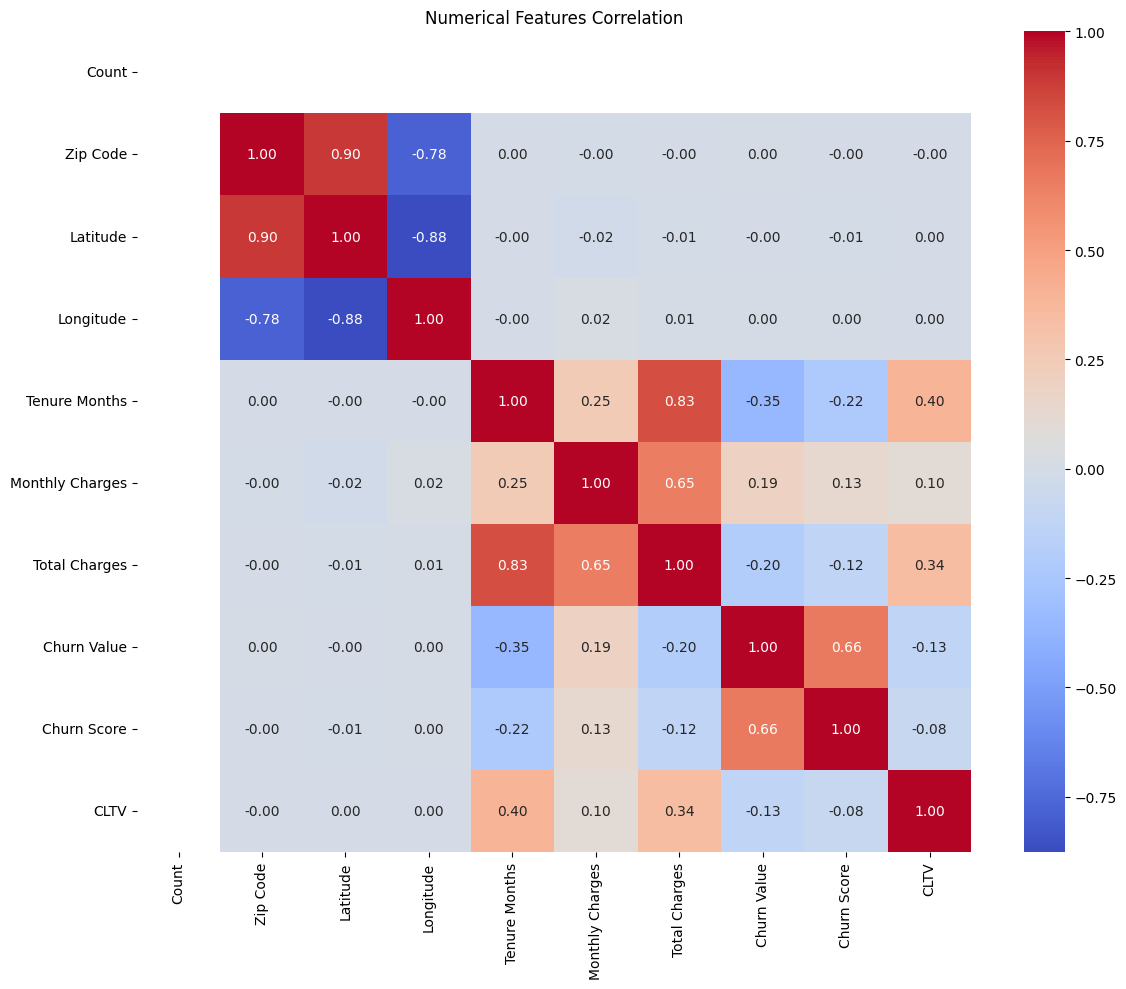

In [5]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_features.corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numerical Features Correlation')
plt.tight_layout()
plt.savefig("numerical_features_correlation.png", dpi=300)
plt.show()

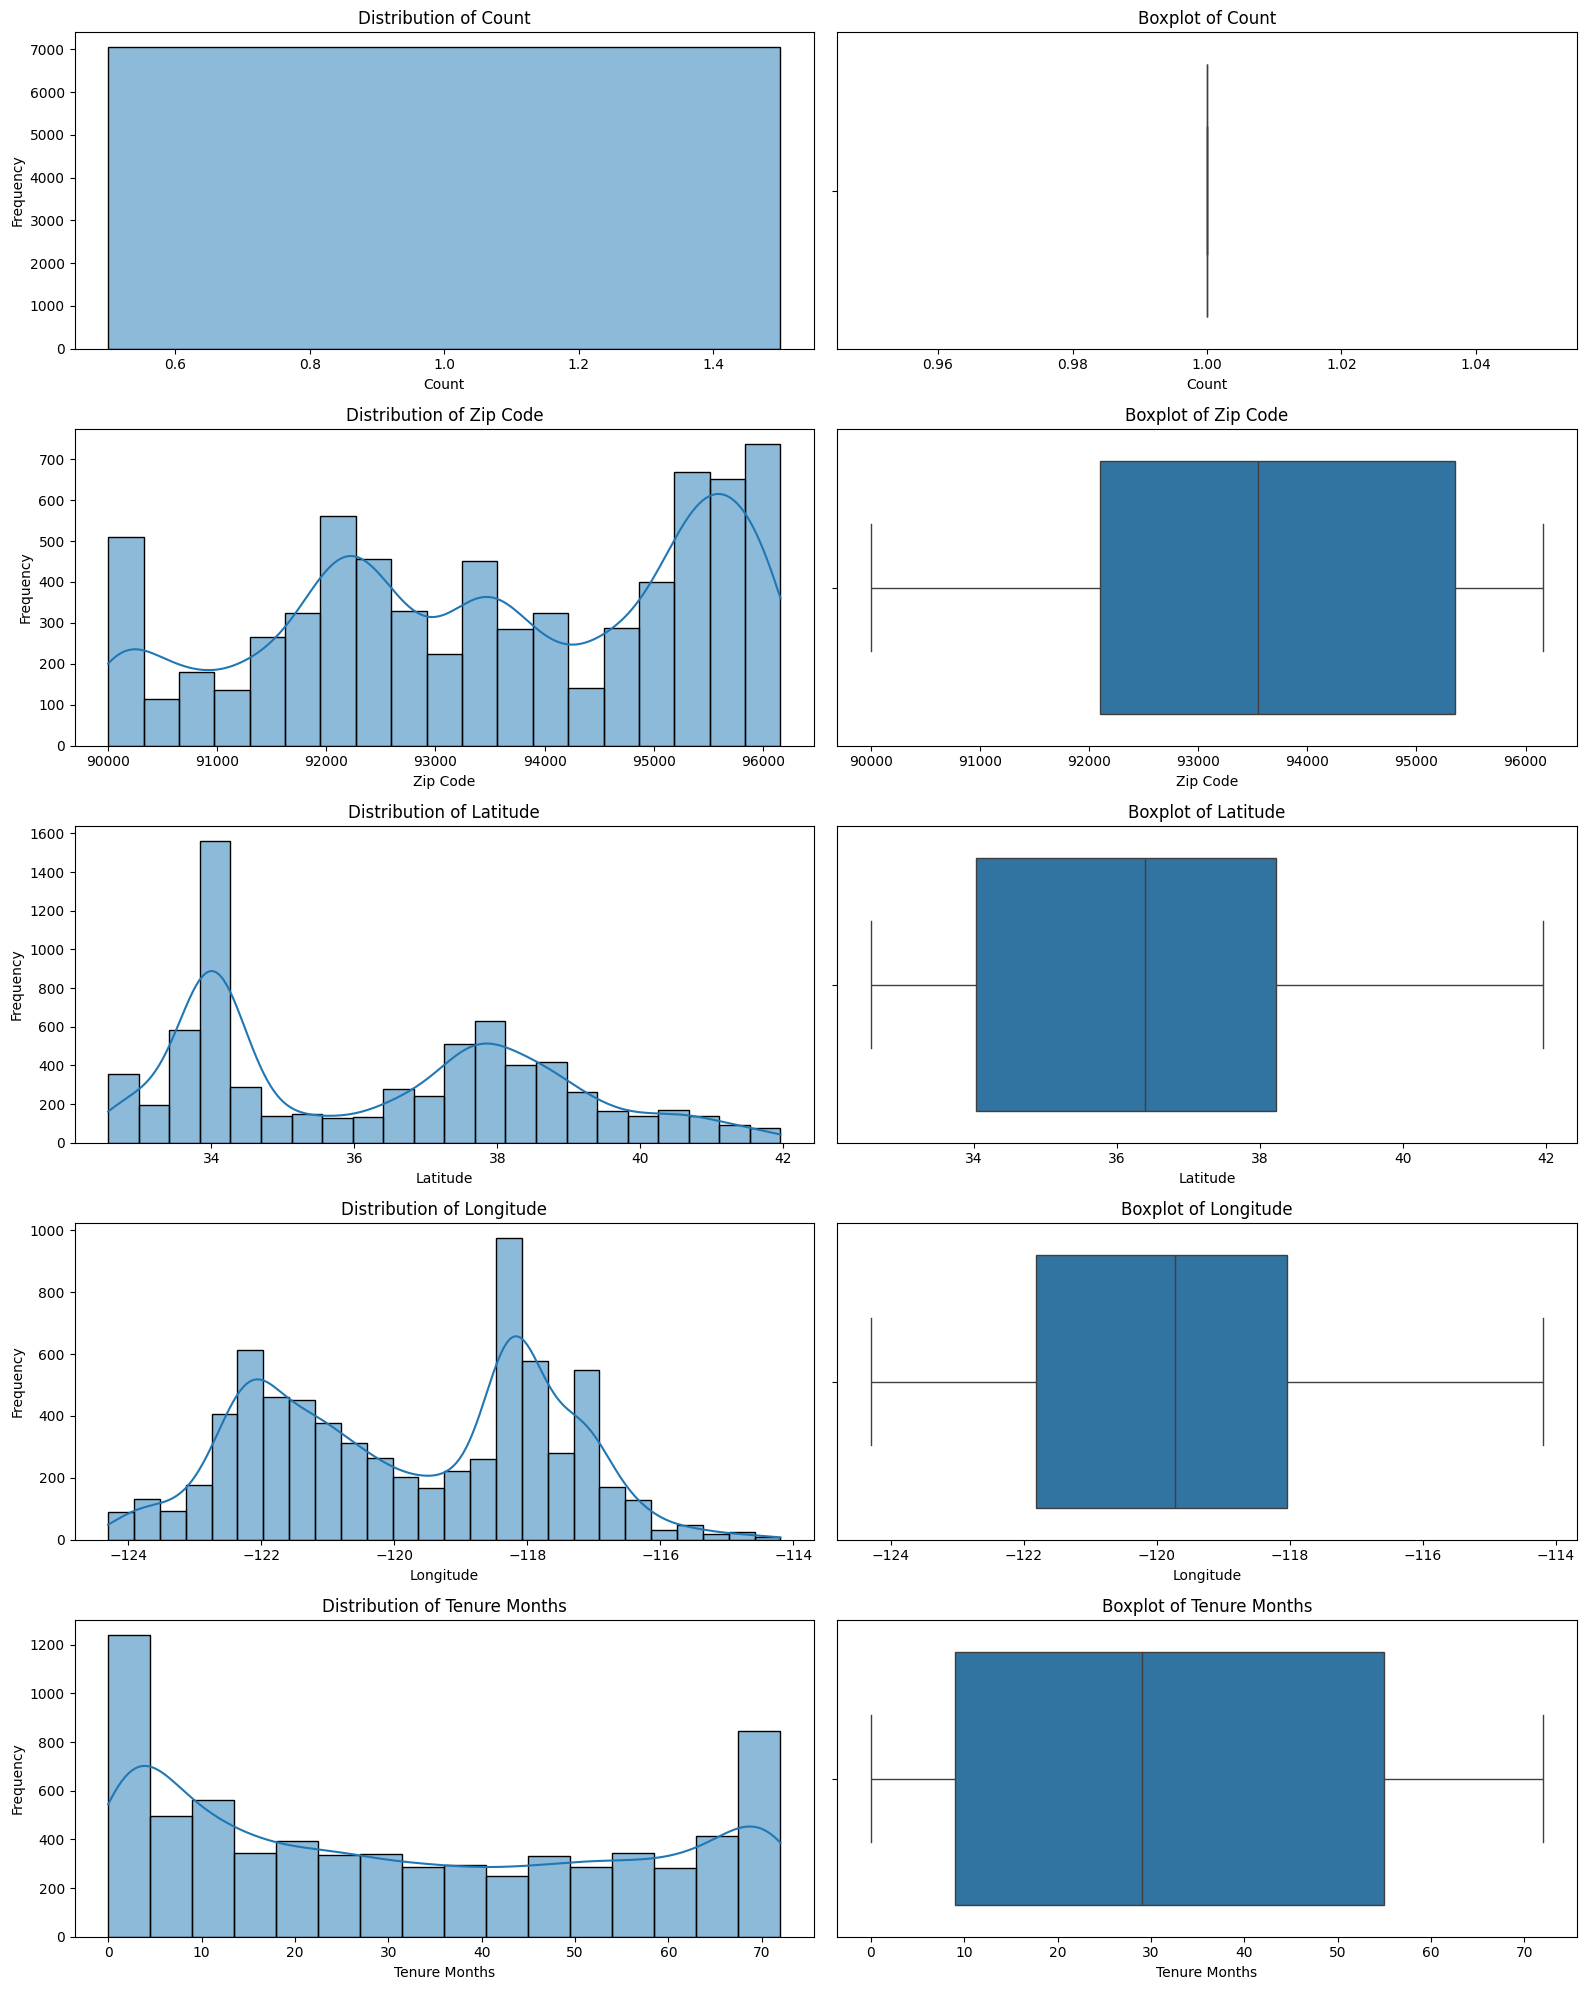

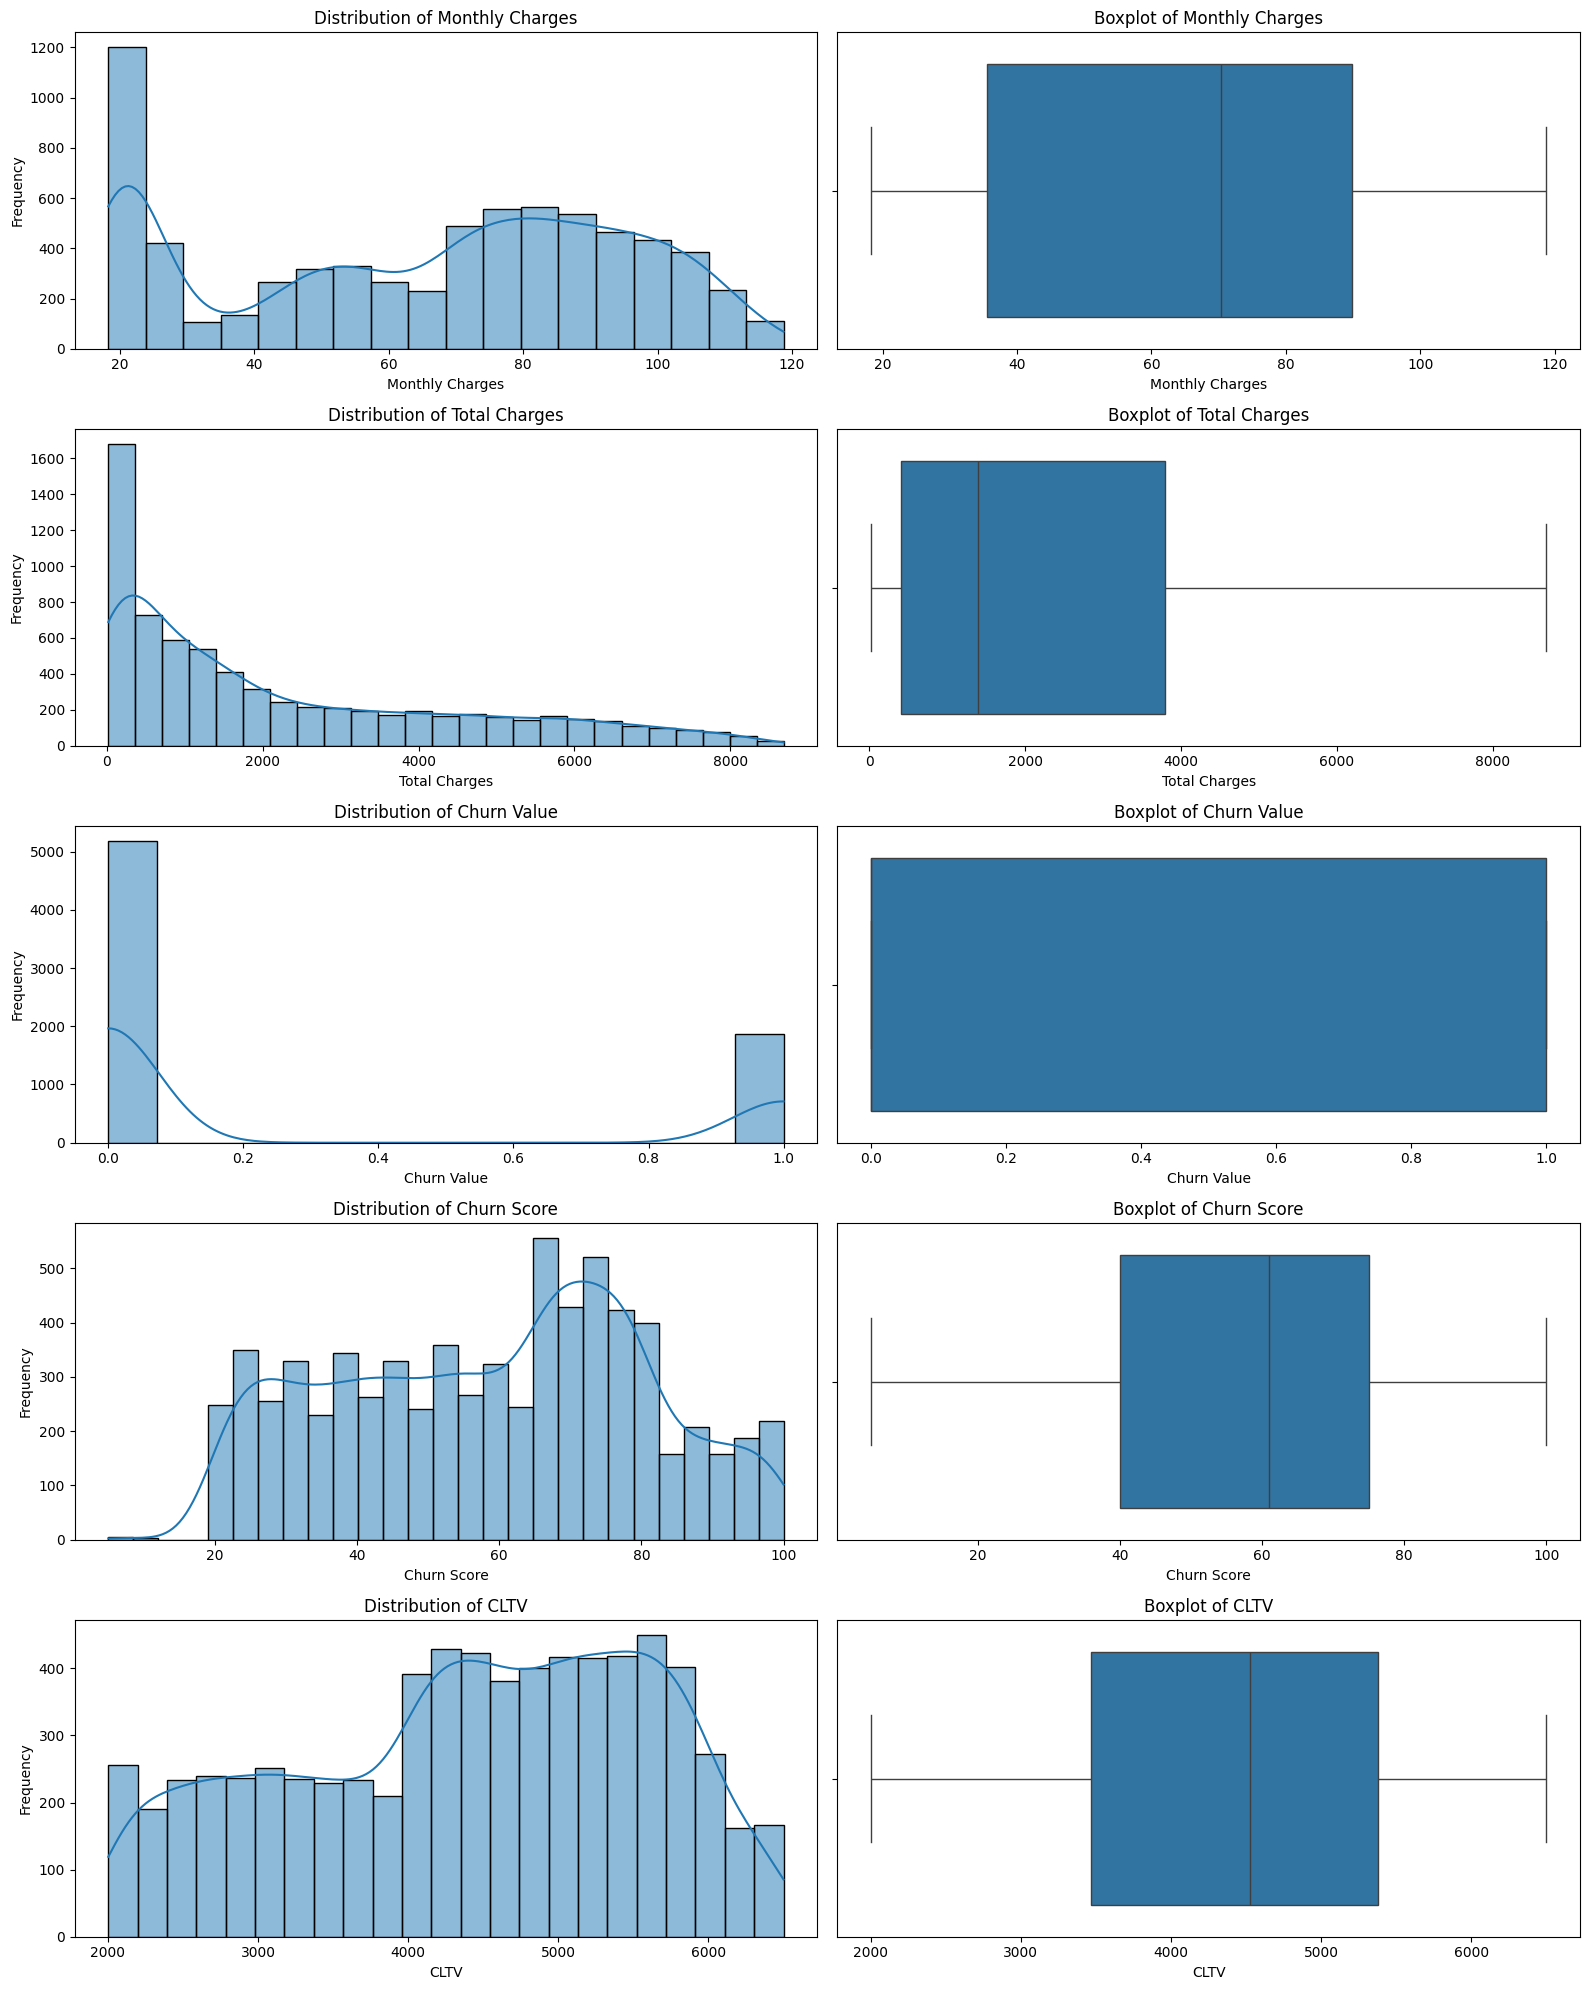

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

numerical_features = [
    'Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months',
    'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV'
]

for feature in numerical_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

n = len(numerical_features)
cols = 2
rows = math.ceil(n / 2)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4 * rows))
for i, feature in enumerate(numerical_features[:5]):
    # Histogram
    sns.histplot(df[feature].dropna(), kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {feature}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df[feature].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {feature}')
    axes[i, 1].set_xlabel(feature)

plt.tight_layout()
plt.savefig("numerical_distributions_part1.png")

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4 * rows))
for i, feature in enumerate(numerical_features[5:]):
    # Histogram
    sns.histplot(df[feature].dropna(), kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {feature}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df[feature].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {feature}')
    axes[i, 1].set_xlabel(feature)

plt.tight_layout()
plt.savefig("numerical_distributions_part2.png")


IndexError: index -20 is out of bounds for axis 0 with size 12

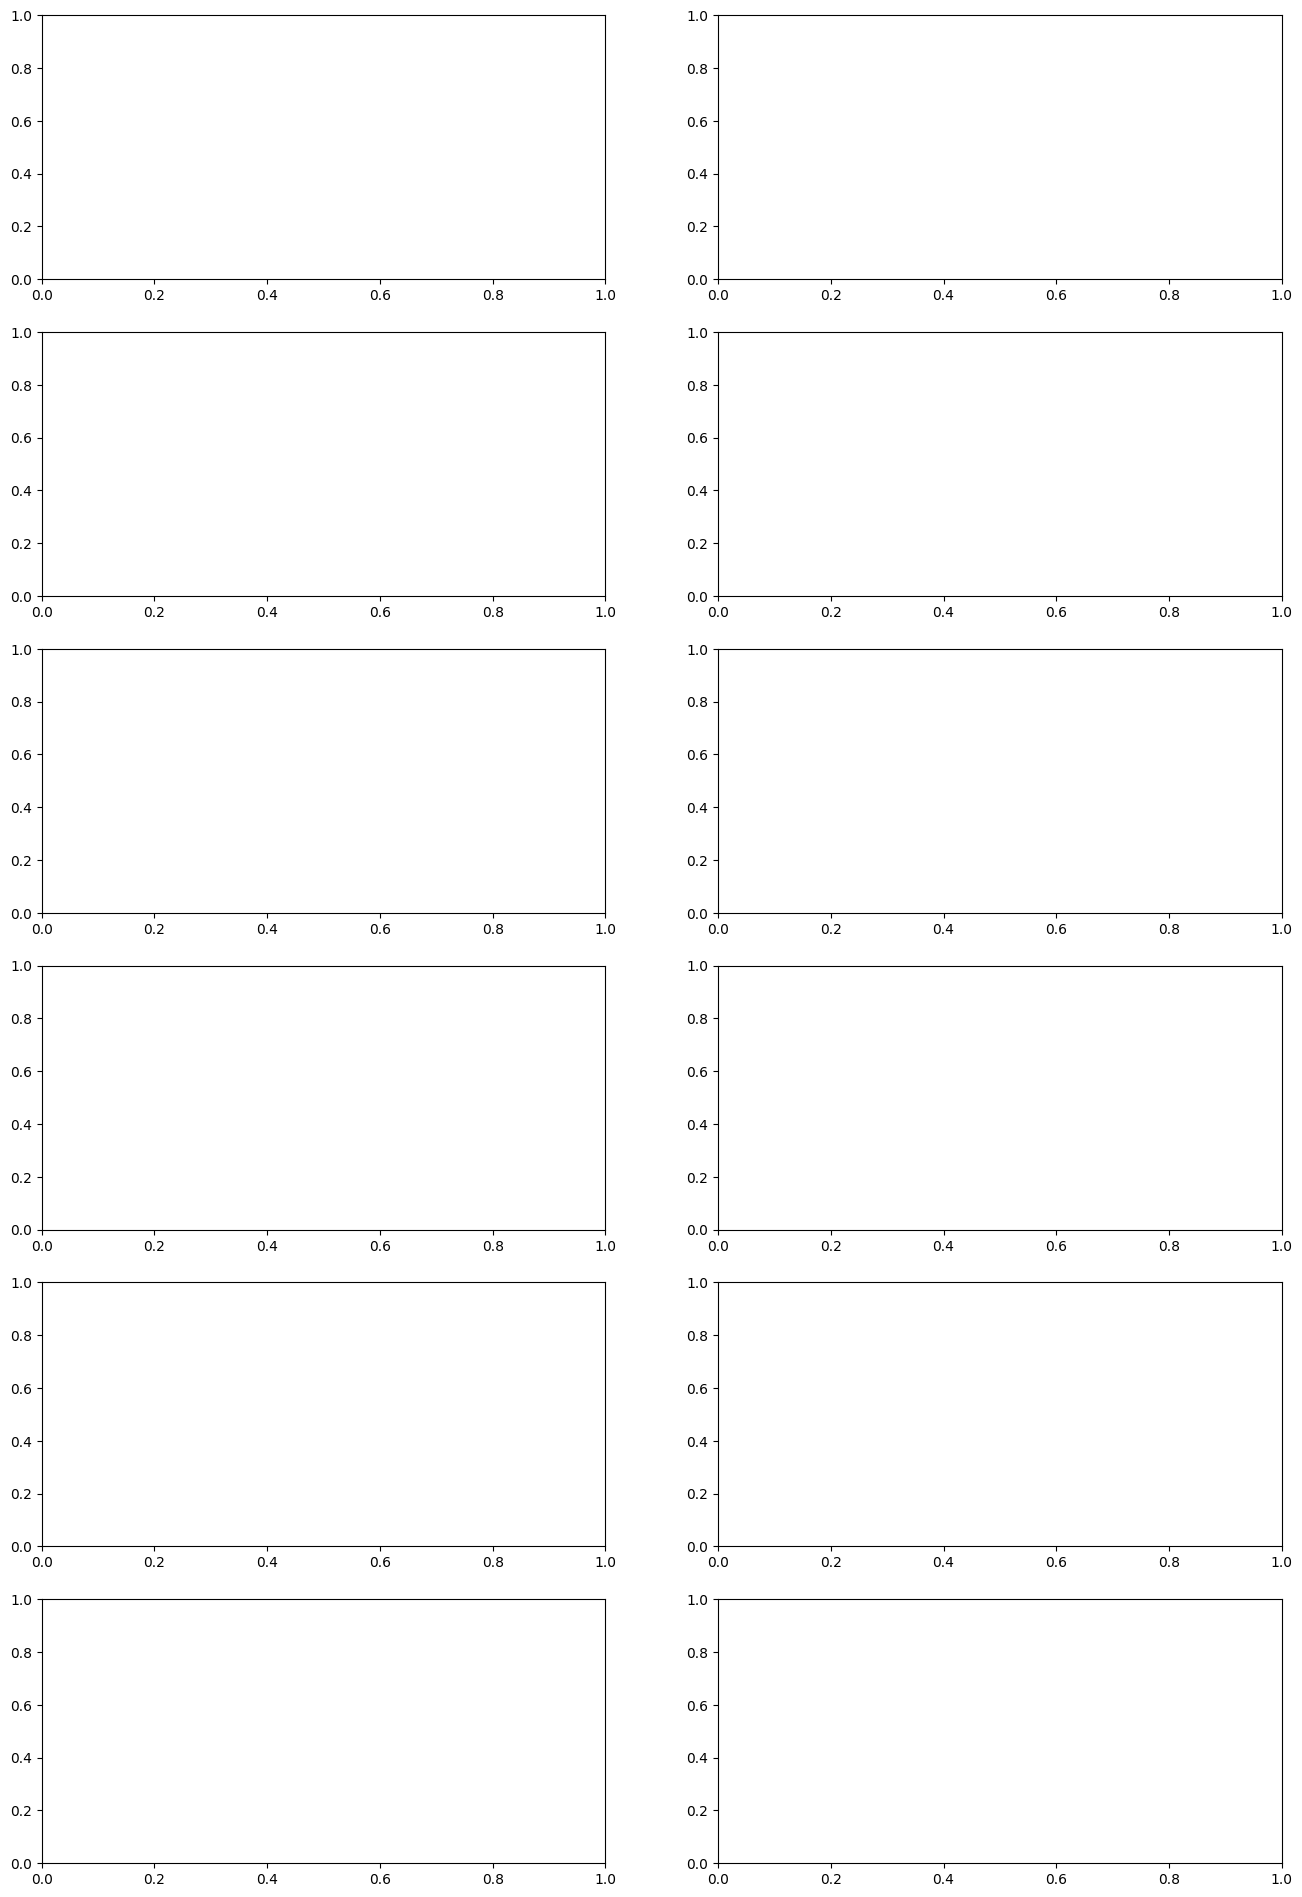

In [7]:
# Bar charts
import matplotlib.pyplot as plt

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_features = [col for col in categorical_columns if col not in ['Country', 'State', 'City']]
features_per_part = 6  # 6 features = 12 plots per part
num_parts = (len(categorical_features) + features_per_part - 1)

for part in range(num_parts):
    start_idx = part * features_per_part
    end_idx = min(start_idx + features_per_part, len(categorical_features))
    
    # 6 rows (1 for each feature) and 2 columns (bar and pie)
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(16, 6*4))  # 6*4=24 inches height
    axes = axes.flatten()
    
    for i in range(start_idx, end_idx):
        feature = categorical_features[i]
        plot_idx = (i - start_idx) * 2  # Each feature takes 2 plots
        
        # Bar plot (left column)
        sns.countplot(x=df[feature], ax=axes[plot_idx])
        axes[plot_idx].set_title(f'Bar Chart of {feature}')
        axes[plot_idx].set_xlabel('')
        axes[plot_idx].set_ylabel('Count')
        
        # Pie plot (right column)
        df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                      startangle=90, cmap='Set2', ax=axes[plot_idx+1])
        axes[plot_idx+1].set_title(f'Pie Chart of {feature}')
        axes[plot_idx+1].set_ylabel('')
    
    # Hide unused axes if the last part has less than 6 features
    for j in range((end_idx - start_idx) * 2, 12):
        axes[j].axis('off')
    
    fig.tight_layout()
    fig.savefig(f"categorical_distributions_part{part+1}.jpg", dpi=100, bbox_inches='tight')
    plt.close(fig)

In [8]:
# scatter plots
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from itertools import combinations
import math

numerical_features = ['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 
                      'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']

for feature in numerical_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
df_num = df[numerical_features].dropna()
os.makedirs("scatterplots", exist_ok=True)
pairs = list(combinations(numerical_features, 2))
n = len(pairs)

cols = 6  
rows = math.ceil(n / cols) 
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, (x, y) in enumerate(pairs[:n // 2]):
    ax = axes[i]
    sns.scatterplot(data=df_num, x=x, y=y, alpha=0.5, ax=ax)
    ax.set_title(f'{x} vs {y}', fontsize=9)
    ax.set_xlabel('')
    ax.set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Scatter Plots of Numerical Features - Part 1', fontsize=16, y=1.02)
plt.subplots_adjust(top=0.96)
fig.savefig("scatterplots/scatter_plots_part1.jpeg", bbox_inches='tight')
plt.close()


fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, (x, y) in enumerate(pairs[n // 2:]):
    ax = axes[i]
    sns.scatterplot(data=df_num, x=x, y=y, alpha=0.5, ax=ax)
    ax.set_title(f'{x} vs {y}', fontsize=9)
    ax.set_xlabel('')
    ax.set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.suptitle('Scatter Plots of Numerical Features - Part 2', fontsize=16, y=1.02)
plt.subplots_adjust(top=0.96)
fig.savefig("scatterplots/scatter_plots_part2.jpeg", bbox_inches='tight')
plt.close()

In [9]:
# pair plots
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from itertools import combinations

numerical_features = ['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months',
                      'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']

for feature in numerical_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

df_num = df[numerical_features].dropna()

os.makedirs("pairplots", exist_ok=True)

pairplot_fig = sns.pairplot(df_num)
pairplot_fig.fig.suptitle("Pairwise Relationships of Numerical Features", y=1.02)
pairplot_fig.savefig("pairplots/pairplot_all_numerical.png", bbox_inches='tight')
plt.close()


In [ ]:
# class imbalance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.makedirs("class_imbalance", exist_ok=True)

plt.figure(figsize=(6, 4))
sns.countplot(x="Churn Value", data=df, palette='pastel')
plt.title('Class Distribution - Churn Value')
plt.xlabel('Churn Value (0 = Not Churned, 1 = Churned)')
plt.ylabel('Count')

for i, count in enumerate(df['Churn Value'].value_counts().sort_index()):
    plt.text(i, count + 50, str(count), ha='center')

plt.tight_layout()
plt.savefig("class_imbalance/churn_value_distribution.png", dpi=300)
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x="Churn Label", data=df, palette='Set2')
plt.title('Class Distribution - Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Count')

for i, count in enumerate(df['Churn Label'].value_counts()):
    plt.text(i, count + 50, str(count), ha='center')

plt.tight_layout()
plt.savefig("class_imbalance/churn_label_distribution.png", dpi=300)
plt.show()
